# Feature Engineering 1 Assignment

## Imports and Connection

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats.mstats import winsorize
import seaborn as sns
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import warnings
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox

warnings.filterwarnings('ignore')

In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

exams_df = pd.read_sql_query('select * from studentsperformance', con=engine)

engine.dispose()

## Understanding the Data

In [5]:
exams_df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

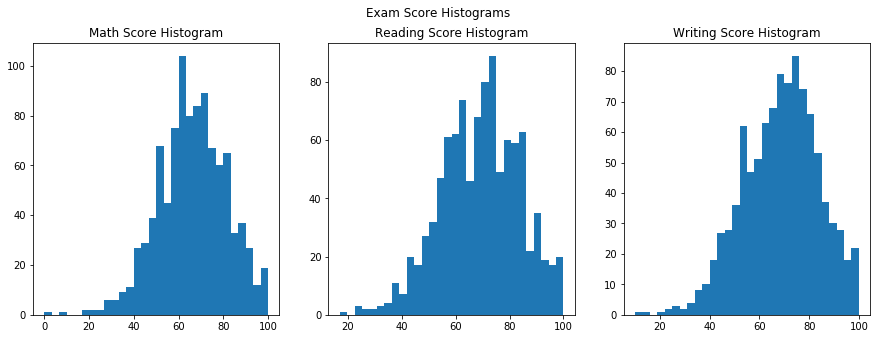

In [29]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.hist(exams_df['math score'], bins = 30)
plt.title('Math Score Histogram')

plt.subplot(1,3,2)
plt.hist(exams_df['reading score'], bins = 30)
plt.title('Reading Score Histogram')

plt.subplot(1,3,3)
plt.hist(exams_df['writing score'], bins = 30)
plt.title('Writing Score Histogram')

plt.suptitle('Exam Score Histograms')
plt.show()

In [61]:
jb_stats = jarque_bera(exams_df["math score"])
norm_stats = normaltest(exams_df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(exams_df["reading score"])
norm_stats = normaltest(exams_df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(exams_df["writing score"])
norm_stats = normaltest(exams_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.911545403379064 and p value is 0.0003506322159360087
Normality test statistics is 15.4083609840894 and p value is 0.0004509380938631557
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


### Not a normal distribution. Going to proceed with Box-Cox.

In [38]:
#the zero in the math score is not allowing for boxcox transformation.
exams_df['math score'].describe()

count    1000.000000
mean       66.089001
std        15.163076
min         0.001000
25%        57.000000
50%        66.000000
75%        77.000000
max       100.000000
Name: math score, dtype: float64

In [39]:
#there is only one, so it can be adjusted without affecting the overall data much
exams_df.loc[exams_df['math score']==0].count()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [40]:
#replace 0 with .001. Has minimal impact, but allows for box cox
exams_df['math score'] = exams_df['math score'].replace(0, .001)

In [41]:
exams_df['math score'].describe()

count    1000.000000
mean       66.089001
std        15.163076
min         0.001000
25%        57.000000
50%        66.000000
75%        77.000000
max       100.000000
Name: math score, dtype: float64

In [42]:
math_boxcox,_ = boxcox(exams_df['math score'])
reading_boxcox,_ = boxcox(exams_df['reading score'])
writing_boxcox,_ = boxcox(exams_df['writing score'])

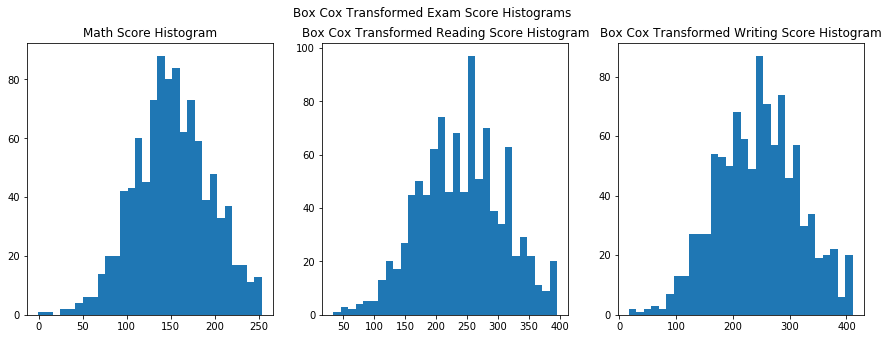

In [43]:
plt.figure(figsize = (15,5))

#this one is not transformed because of the zero value
plt.subplot(1,3,1)
plt.hist(math_boxcox, bins = 30)
plt.title('Math Score Histogram')

plt.subplot(1,3,2)
plt.hist(reading_boxcox, bins = 30)
plt.title('Box Cox Transformed Reading Score Histogram')

plt.subplot(1,3,3)
plt.hist(writing_boxcox, bins = 30)
plt.title('Box Cox Transformed Writing Score Histogram')

plt.suptitle('Box Cox Transformed Exam Score Histograms')
plt.show()

In [62]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.1162351840139517 and p value is 0.5722853250197999
Normality test statistics is 1.035986101638081 and p value is 0.5957149186167072
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712


### Now normally distributed. 

## 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [53]:
exams_df['overall score'] = (exams_df['math score'] + exams_df['reading score'] + exams_df['writing score']) / 3

In [54]:
exams_df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
0,female,group B,bachelor's degree,standard,none,72.0,72,74,72.666667
1,female,group C,some college,standard,completed,69.0,90,88,82.333333
2,female,group B,master's degree,standard,none,90.0,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,49.333333
4,male,group C,some college,standard,none,76.0,78,75,76.333333


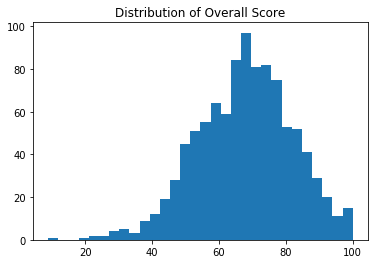

In [58]:
plt.hist(exams_df['overall score'], bins = 30)
plt.title('Distribution of Overall Score')
plt.show()

In [67]:
exam_score = (exams_df["math score"] + exams_df["reading score"] + exams_df["writing score"])/3

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistics is 15.453231723268715 and p value is 0.00044093377598231065
Normality test statistics is 15.186572051817919 and p value is 0.0005038227562212466


In [59]:
overall_score_boxcox,_ = boxcox(exams_df['overall score'])

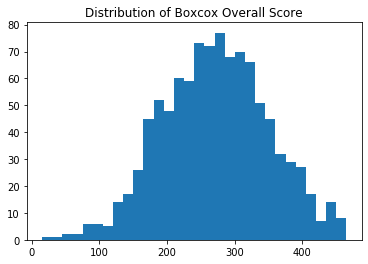

In [60]:
plt.hist(overall_score_boxcox, bins = 30)
plt.title('Distribution of Boxcox Overall Score')
plt.show()

In [68]:
jb_stats = jarque_bera(overall_score_boxcox)
norm_stats = normaltest(overall_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistics is 2.4354158145116975 and p value is 0.29590763796410113
Normality test statistics is 2.7798809633623836 and p value is 0.2490901296162312


## 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

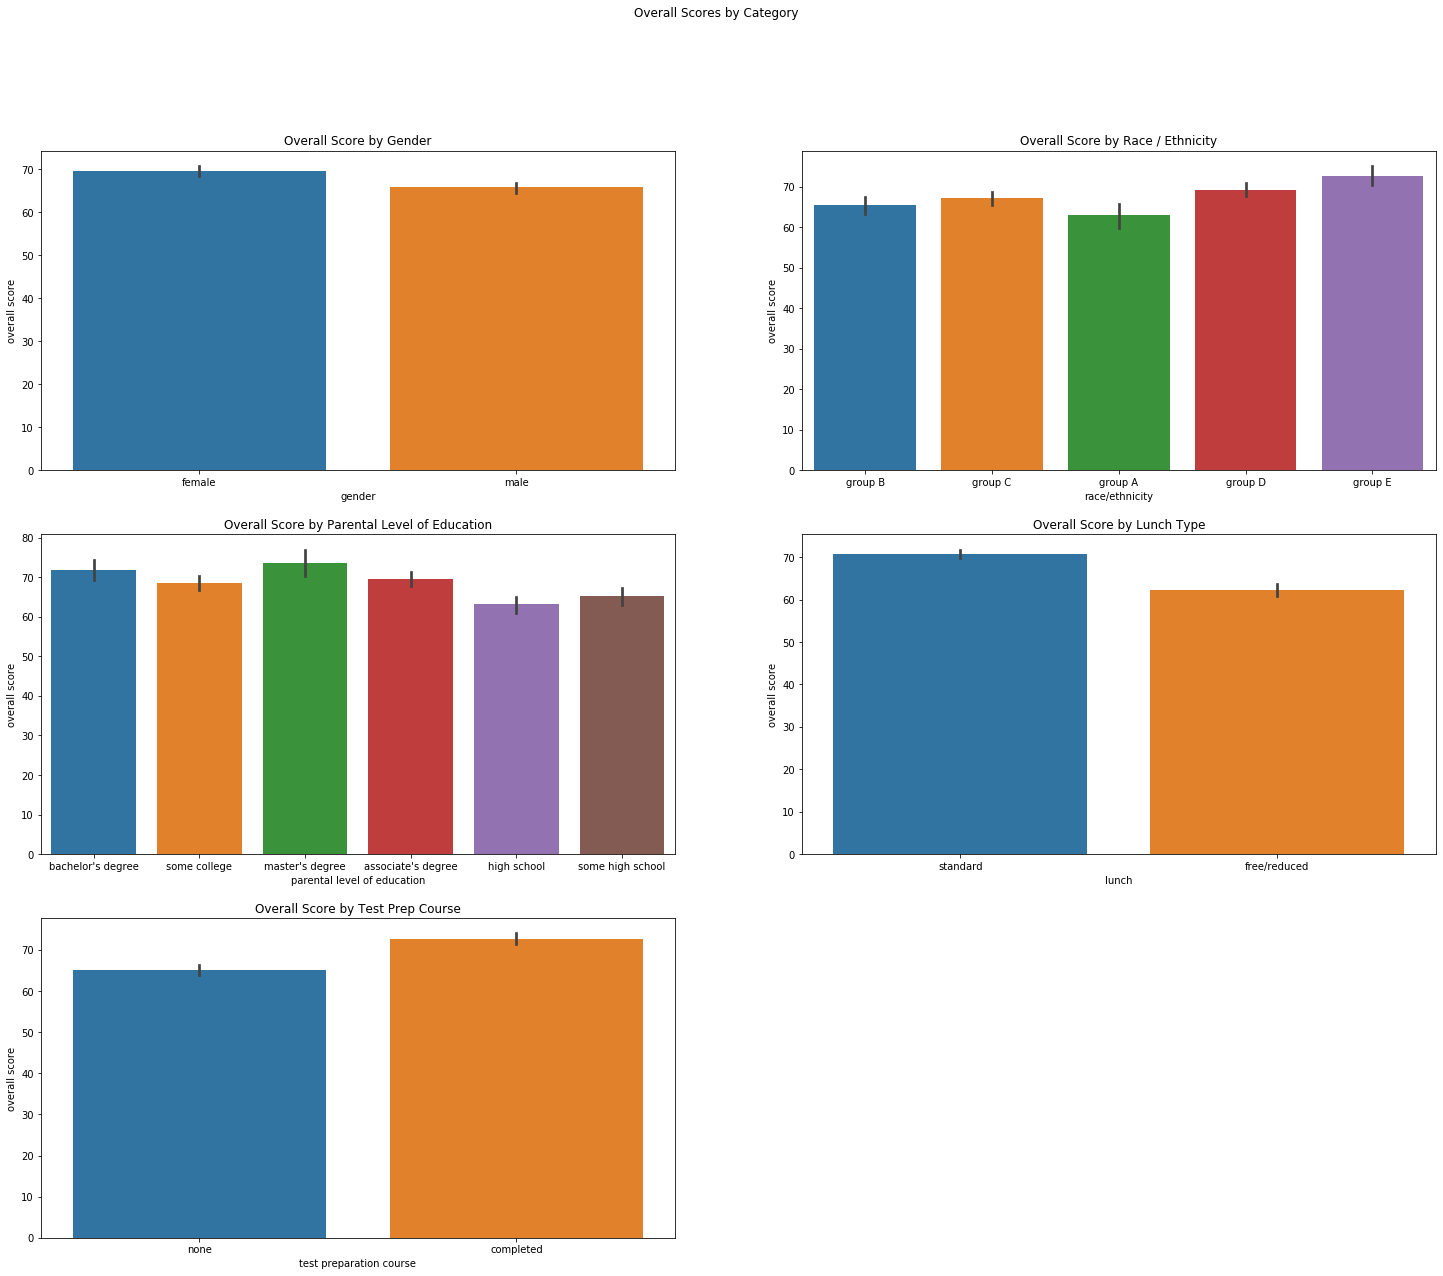

In [84]:
plt.figure(figsize = (25,20))

plt.subplot(3,2,1)
sns.barplot(exams_df['gender'], exams_df['overall score'])
plt.title('Overall Score by Gender')

plt.subplot(3,2,2)
sns.barplot(exams_df['race/ethnicity'], exams_df['overall score'])
plt.title('Overall Score by Race / Ethnicity')

plt.subplot(3,2,3)
sns.barplot(exams_df['parental level of education'], exams_df['overall score'])
plt.title('Overall Score by Parental Level of Education')

plt.subplot(3,2,4)
sns.barplot(exams_df['lunch'], exams_df['overall score'])
plt.title('Overall Score by Lunch Type')

plt.subplot(3,2,5)
sns.barplot(exams_df['test preparation course'], exams_df['overall score'])
plt.title('Overall Score by Test Prep Course')

plt.suptitle('Overall Scores by Category')
plt.show()

## Conclusion

- Females score higher than males.
- Ethnicity E scores highest while ethnicity A scores the lowest.
- Overall, as parents education increases, scores also increase. However, parents with some high school score higher than students that have parents that are high school graduates.
- Free/reduced lunch students score lower than students on standard lunches. 
- Students who have completed test prep course score higher than those that have not. 